In [1]:
#импорт необходимых библиотек
import numpy as np #линейная алгебра
import pandas as pd #обработка данных CSV, I/O
%matplotlib inline
import matplotlib.pyplot as plt  #графики в стиле matlab
import seaborn as sns #статистические графики
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #игнорим предупреждения от sklearn и seaborn
from scipy import stats
from scipy.stats import norm, skew #для статистики
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #ограничиваем вещественный вывод до 3-х знаков

In [2]:
train = pd.read_csv('train.csv') #читаем датасеты
test = pd.read_csv('test.csv')

In [3]:
train.shape

(891, 12)

In [6]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex    Age  SibSp  \
0                            Braund, Mr. Owen Harris    male 22.000      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1   
2                             Heikkinen, Miss. Laina  female 26.000      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.000      1   
4                           Allen, Mr. William Henry    male 35.000      0   

   Parch            Ticket   Fare Cabin Embarked  
0      0         A/5 21171  7.250   NaN        S  
1      0          PC 17599 71.283   C85        C  
2      0  STON/O2. 3101282  7.925   NaN        S  
3      0            113803 53.100  C123        S  
4      0            373450  8.050   NaN        S

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

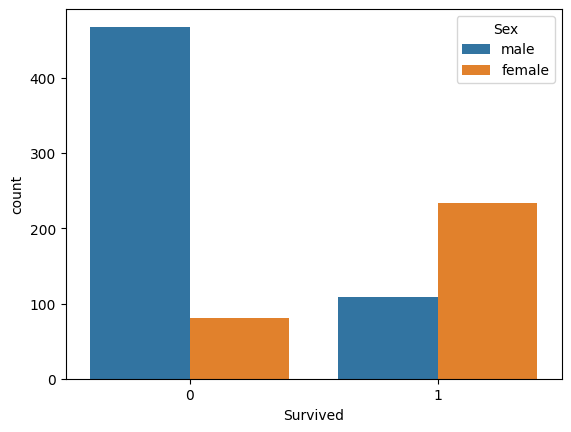

In [8]:
sns.countplot(x='Survived',hue='Sex', data=train)

<Axes: xlabel='Survived', ylabel='count'>

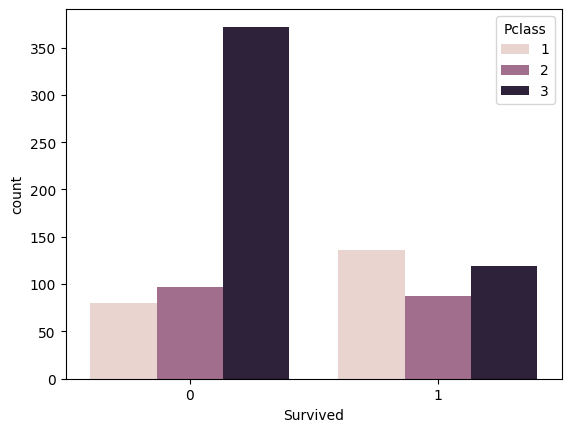

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=train)

In [10]:
features = ['Sex', 'Pclass', 'SibSp', 'Parch']
y = train['Survived']
x = pd.get_dummies(train[features])
x_test = pd.get_dummies(test[features])

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x,y)

RandomForestClassifier(max_depth=5, random_state=1)

In [13]:
prediction=model.predict(x_test)
output = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':prediction})
output.to_csv('submission.csv', index=False)